<a href="https://colab.research.google.com/github/skandac/demo/blob/main/Regression_skac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.random.rand(20)
y = np.random.rand(20)


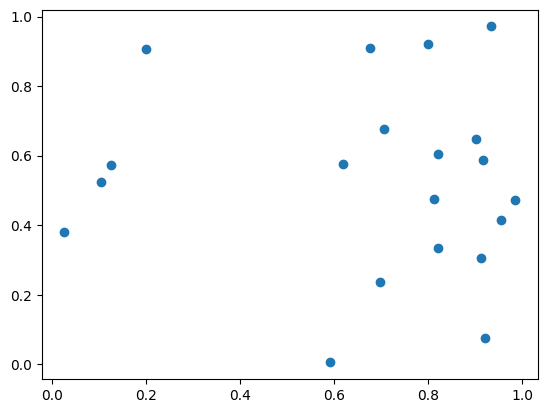

In [7]:
plt.scatter(X, y)


In [8]:
import sklearn.linear_model as lm
model = lm.LinearRegression()

model.fit(X.reshape(-1, 1), y)

LinearRegression()

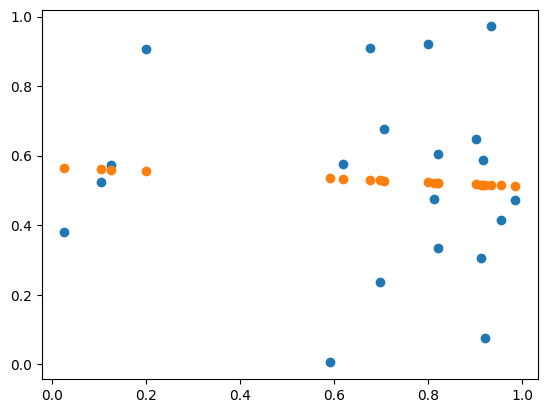

In [12]:
m = model.coef_
b = model.intercept_
plt.scatter(X, y)
plt.scatter(X, m * X + b)


In [15]:
m, b

(array([-0.05476042]), np.float64(0.5668876305233288))

In [33]:
m = 0
b = 0
alpha = 0.1
for i in range(1000):
  y_pred = m * X + b
  pd_b = 1/20 * sum(y_pred - y)
  pd_m = 1/20 * sum((y_pred - y) * X)
  b = b - alpha * pd_b #b = b - α * ∂J/∂b
  m = m - alpha * pd_m #m = m - α * ∂J/∂m


In [34]:
m, b


(np.float64(-0.05412546911004587), np.float64(0.5664298100632448))

SGD

In [45]:
m1 = 0
b1 = 0
alpha = 0.1

n = len(X)
losses = []

for i in range(800):

  idx = np.random.randint(0, n)
  x_i = X[idx]
  y_i = y[idx]

  # Prediction for this sample
  y_pred = m1 * x_i + b1

  # Gradients based on just this one point
  pd_b = (y_pred - y_i)
  pd_m = (y_pred - y_i) * x_i

  b1 = b1 - alpha * pd_b #b = b - α * ∂J/∂b
  m1 = m1 - alpha * pd_m #m = m - α * ∂J/∂m

  current_loss = (y_pred - y_i) ** 2
  losses.append(current_loss)



-0.017411099429063194 0.4743293448475515


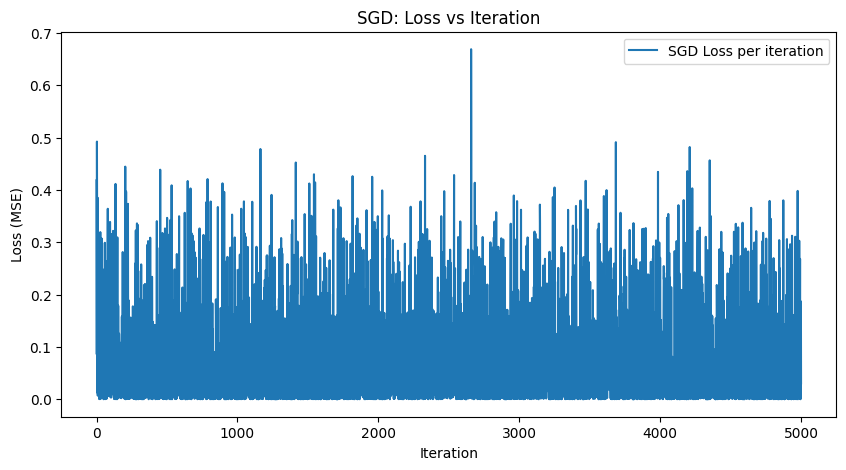

In [44]:
print(m1, b1)

# Plot
plt.figure(figsize=(10,5))
plt.plot(losses, label='SGD Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('SGD: Loss vs Iteration')
plt.legend()
plt.show()